# Classification Metrics - Metricas de Clasificación

In the last notebook we fit binary classifier to predict whether patients were diabetic or not. We used accuracy as a measure of how well the model performed, but accuracy isn't everything. In this notebook, we will look at alternatives to accuracy that can be much more useful in machine learning.

En el último cuaderno ajustamos un clasificador binario para predecir si los pacientes eran diabéticos o no. Usamos la precisión como una medida de qué tan bien se desempeñó el modelo, pero la precisión no lo es todo. En este cuaderno, veremos alternativas a la precisión que pueden ser mucho más útiles en el aprendizaje automático.

## Alternative metrics for binary classifiers - Métricas alternativas para clasificadores binarios

Accuracy seems like a sensible metric to evaluate (and to a certain extent it is), but you need to be careful about drawing too many conclusions from the accuracy of a classifier. Remember that it's simply a measure of how many cases were predicted correctly. Suppose only 3% of the population is diabetic. You could create a classifier that always just predicts 0, and it would be 97% accurate - but not terribly helpful in identifying patients with diabetes!

La precisión parece una métrica sensata para evaluar (y hasta cierto punto lo es), pero debe tener cuidado al sacar demasiadas conclusiones de la precisión de un clasificador. Recuerde que es simplemente una medida de cuántos casos se predijeron correctamente. Supongamos que sólo el 3% de la población es diabética. Podría crear un clasificador que siempre solo prediga 0, y tendría una precisión del 97 %, ¡pero no muy útil para identificar a los pacientes con diabetes!

Fortunately, there are some other metrics that reveal a little more about how our model is performing. Scikit-Learn includes the ability to create a *classification report* that provides more insight than raw accuracy alone.

Afortunadamente, hay algunas otras métricas que revelan un poco más sobre el rendimiento de nuestro modelo. Scikit-Learn incluye la capacidad de crear un *informe de clasificación* que proporciona más información que la precisión pura por sí sola.

To get started, run the next cell to load our data and train our model like last time.

Para comenzar, ejecute la siguiente celda para cargar nuestros datos y entrenar nuestro modelo como la última vez.

In [2]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


# load the training dataset
#!wget https://raw.githubusercontent.com/MicrosoftDocs/mslearn-introduction-to-machine-learning/main/Data/ml-basics/diabetes.csv
diabetes = pd.read_csv('diabetes.csv')

# Separate features and labels
features = ['Pregnancies','PlasmaGlucose','DiastolicBloodPressure','TricepsThickness','SerumInsulin','BMI','DiabetesPedigree','Age']
label = 'Diabetic'
X, y = diabetes[features].values, diabetes[label].values


# Split data 70%-30% into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=0)

print ('Training cases: %d\nTest cases: %d' % (X_train.shape[0], X_test.shape[0]))

# Train the model
from sklearn.linear_model import LogisticRegression

# Set regularization rate
reg = 0.01

# train a logistic regression model on the training set
model = LogisticRegression(C=1/reg, solver="liblinear").fit(X_train, y_train)

predictions = model.predict(X_test)
print('Predicted labels: ', predictions)
print('Actual labels:    ' ,y_test)


print('Accuracy: ', accuracy_score(y_test, predictions))


Training cases: 10500
Test cases: 4500
Predicted labels:  [0 0 0 ... 0 1 0]
Actual labels:     [0 0 1 ... 1 1 1]
Accuracy:  0.7888888888888889


One of the simplest places to start is a classification report. Run the next cell to see a range of alternatives ways to assess our model.

Uno de los lugares más simples para comenzar es un informe de clasificación. Ejecute la siguiente celda para ver una variedad de formas alternativas de evaluar nuestro modelo.

In [3]:
from sklearn. metrics import classification_report

print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.81      0.88      0.85      2986
           1       0.72      0.60      0.66      1514

    accuracy                           0.79      4500
   macro avg       0.77      0.74      0.75      4500
weighted avg       0.78      0.79      0.78      4500



The classification report includes the following metrics for each class  (0 and 1)

El informe de clasificación incluye las siguientes métricas para cada clase (0 y 1)

> note that the header row may not line up with the values!
> tenga en cuenta que es posible que la fila del encabezado no coincida con los valores.

* *Precision*: Of the predictions the model made for this class, what proportion were correct?
* *Precisión*: De las predicciones que hizo el modelo para esta clase, ¿qué proporción fueron correctas?

* *Recall*: Out of all of the instances of this class in the test dataset, how many did the model identify?
* *Recuerde*: De todas las instancias de esta clase en el conjunto de datos de prueba, ¿cuántas identificó el modelo?

* *F1-Score*: An average metric that takes both precision and recall into account.
* *F1-Score*: una métrica promedio que tiene en cuenta tanto la precisión como la recuperación.

* *Support*: How many instances of this class are there in the test dataset?
* *Soporte*: ¿Cuántas instancias de esta clase hay en el conjunto de datos de prueba?

The classification report also includes averages for these metrics, including a weighted average that allows for the imbalance in the number of cases of each class.

El informe de clasificación también incluye promedios para estas métricas, incluido un promedio ponderado que permite el desequilibrio en la cantidad de casos de cada clase.

Because this is a *binary* classification problem, the ***1*** class is considered *positive* and its precision and recall are particularly interesting - these in effect answer the questions:

Debido a que este es un problema de clasificación *binario*, la clase ***1*** se considera *positiva* y su precisión y recuperación son particularmente interesantes; en efecto, responden las preguntas:

- Of all the patients the model predicted are diabetic, how many are actually diabetic?
- De todos los pacientes que el modelo predijo que son diabéticos, ¿cuántos son realmente diabéticos?

- Of all the patients that are actually diabetic, how many did the model identify?
- De todos los pacientes que en realidad son diabéticos, ¿cuántos identificó el modelo?

You can retrieve these values on their own by using the **precision_score** and **recall_score** metrics in scikit-learn (which by default assume a binary classification model).

Puede recuperar estos valores por sí solos usando las métricas **precision_score** y **recall_score** en scikit-learn (que por defecto asumen un modelo de clasificación binaria).

In [4]:
from sklearn.metrics import precision_score, recall_score

print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))

Overall Precision: 0.7231012658227848
Overall Recall: 0.6036988110964333


The precision and recall metrics are derived from four possible prediction outcomes:

Las métricas de precisión y recuperación se derivan de cuatro posibles resultados de predicción:

* *True Positives*: The predicted label and the actual label are both 1.
* *Verdaderos positivos*: la etiqueta pronosticada y la etiqueta real son ambas 1.

* *False Positives*: The predicted label is 1, but the actual label is 0.
* *Falsos positivos*: la etiqueta predicha es 1, pero la etiqueta real es 0.

* *False Negatives*: The predicted label is 0, but the actual label is 1.
* *Falsos negativos*: la etiqueta predicha es 0, pero la etiqueta real es 1.

* *True Negatives*: The predicted label and the actual label are both 0.
* *Negativos verdaderos*: la etiqueta pronosticada y la etiqueta real son ambas 0.

These metrics are generally tabulated for the test set and shown together as a *confusion matrix*, which takes the following form:

Estas métricas generalmente se tabulan para el conjunto de prueba y se muestran juntas como una *matriz de confusión*, que toma la siguiente forma:

<table style="border: 1px solid black;">
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="lightgray">TN</td><td style="border: 1px solid black;color: black;" bgcolor="white">FP</td>
    </tr>
    <tr style="border: 1px solid black;">
        <td style="border: 1px solid black;color: black;" bgcolor="white">FN</td><td style="border: 1px solid black;color: black;" bgcolor="lightgray">TP</td>
    </tr>
</table>

Note that the correct (*true*) predictions form a diagonal line from top left to bottom right - these figures should be significantly higher than the *false* predictions if the model is any good.

Tenga en cuenta que las predicciones correctas (*verdaderas*) forman una línea diagonal desde la parte superior izquierda hasta la parte inferior derecha; estas cifras deberían ser significativamente más altas que las predicciones *falsas* si el modelo es bueno.

In Python, you can use the **sklearn.metrics.confusion_matrix** function to find these values for a trained classifier:

En Python, puede usar la función **sklearn.metrics.confusion_matrix** para encontrar estos valores para un clasificador entrenado:

In [5]:
from sklearn.metrics import confusion_matrix

# Print the confusion matrix
cm = confusion_matrix(y_test, predictions)
print (cm)

[[2636  350]
 [ 600  914]]


Until now, we've considered the predictions from the model as being either 1 or 0 class labels. Actually, things are a little more complex than that. Statistical machine learning algorithms, like logistic regression, are based on *probability*; so what actually gets predicted by a binary classifier is the probability that the label is true (**P(y)**) and the probability that the label is false (1 - **P(y)**). A threshold value of 0.5 is used to decide whether the predicted label is a 1 (*P(y) > 0.5*) or a 0 (*P(y) <= 0.5*). You can use the **predict_proba** method to see the probability pairs for each case:

Hasta ahora, hemos considerado las predicciones del modelo como etiquetas de clase 1 o 0. En realidad, las cosas son un poco más complejas que eso. Los algoritmos de aprendizaje automático estadístico, como la regresión logística, se basan en *probabilidad*; entonces, lo que realmente predice un clasificador binario es la probabilidad de que la etiqueta sea verdadera (**P(y)**) y la probabilidad de que la etiqueta sea falsa (1 - **P(y)**). Se utiliza un valor de umbral de 0,5 para decidir si la etiqueta predicha es un 1 (*P(y) > 0,5*) o un 0 (*P(y) <= 0,5*). Puedes usar el método **predict_proba** para ver los pares de probabilidad para cada caso:

In [6]:
y_scores = model.predict_proba(X_test)
print(y_scores)

[[0.8167346  0.1832654 ]
 [0.96317962 0.03682038]
 [0.80900866 0.19099134]
 ...
 [0.60687902 0.39312098]
 [0.10608226 0.89391774]
 [0.63833991 0.36166009]]


The decision to score a prediction as a 1 or a 0 depends on the threshold to which the predicted probabilities are compared. If we were to change the threshold, it would affect the predictions; and therefore change the metrics in the confusion matrix. A common way to evaluate a classifier is to examine the *true positive rate* (which is another name for recall) and the *false positive rate* for a range of possible thresholds. These rates are then plotted against all possible thresholds to form a chart known as a *received operator characteristic (ROC) chart*, like this:

La decisión de puntuar una predicción como 1 o 0 depende del umbral con el que se comparan las probabilidades pronosticadas. Si tuviéramos que cambiar el umbral, afectaría las predicciones; y por lo tanto cambiar las métricas en la matriz de confusión. Una forma común de evaluar un clasificador es examinar la *tasa de verdaderos positivos* (que es otro nombre para recordar) y la *tasa de falsos positivos* para un rango de umbrales posibles. Luego, estas tasas se trazan contra todos los umbrales posibles para formar un gráfico conocido como *gráfico de características del operador recibido (ROC)*, como este:

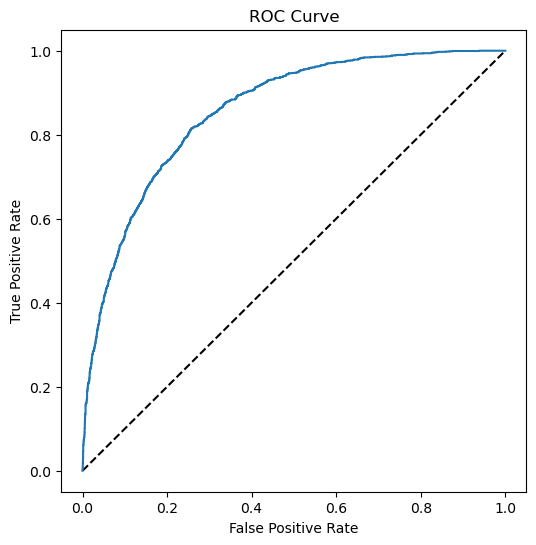

In [7]:
from sklearn.metrics import roc_curve
from sklearn.metrics import confusion_matrix
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

The ROC chart shows the curve of the true and false positive rates for different threshold values between 0 and 1. A perfect classifier would have a curve that goes straight up the left side and straight across the top. The diagonal line across the chart represents the probability of predicting correctly with a 50/50 random prediction; so you obviously want the curve to be higher than that (or your model is no better than simply guessing!).

El gráfico ROC muestra la curva de las tasas de verdaderos y falsos positivos para diferentes valores de umbral entre 0 y 1. Un clasificador perfecto tendría una curva que sube directamente por el lado izquierdo y cruza directamente la parte superior. La línea diagonal que atraviesa el gráfico representa la probabilidad de predecir correctamente con una predicción aleatoria 50/50; por lo que obviamente desea que la curva sea más alta que eso (¡o su modelo no es mejor que simplemente adivinar!).

The area under the curve (AUC) is a value between 0 and 1 that quantifies the overall performance of the model. The closer to 1 this value is, the better the model. Once again, scikit-Learn includes a function to calculate this metric.

El área bajo la curva (AUC) es un valor entre 0 y 1 que cuantifica el rendimiento general del modelo. Cuanto más cerca de 1 sea este valor, mejor será el modelo. Una vez más, scikit-Learn incluye una función para calcular esta métrica.

In [8]:
from sklearn.metrics import roc_auc_score

auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

AUC: 0.8568301125198085


### Perform preprocessing in a pipeline - Realizar preprocesamiento en una canalización

In this case, the ROC curve and its AUC indicate that the model performs better than a random guess which is not bad considering we performed very little preprocessing of the data.

En este caso, la curva ROC y su AUC (The area under the curve) indican que el modelo funciona mejor que una suposición aleatoria, lo cual no está mal considerando que realizamos muy poco preprocesamiento de los datos.

In practice, it's common to perform some preprocessing of the data to make it easier for the algorithm to fit a model to it. There's a huge range of preprocessing transformations you can perform to get your data ready for modeling, but we'll limit ourselves to a few common techniques:

En la práctica, es común realizar algún preprocesamiento de los datos para que sea más fácil para el algoritmo ajustar un modelo a ellos. Hay una gran variedad de transformaciones de preprocesamiento que puede realizar para preparar sus datos para el modelado, pero nos limitaremos a algunas técnicas comunes:

- Scaling numeric features so they're on the same scale. This prevents features with large values from producing coefficients that disproportionately affect the predictions.

- Escalar características numéricas para que estén en la misma escala. Esto evita que las características con valores grandes produzcan coeficientes que afecten de manera desproporcionada a las predicciones.

- Encoding categorical variables. For example, by using a *one hot encoding* technique you can create individual binary (true/false) features for each possible category value.

- Codificación de variables categóricas. Por ejemplo, mediante el uso de una técnica *una codificación en caliente* puede crear características binarias individuales (verdadero/falso) para cada valor de categoría posible.

To apply these preprocessing transformations, we'll make use of a Scikit-Learn feature named *pipelines*. These enable us to define a set of preprocessing steps that end with an algorithm. You can then fit the entire pipeline to the data, so that the model encapsulates all of the preprocessing steps as well as the regression algorithm. This is useful, because when we want to use the model to predict values from new data, we need to apply the same transformations (based on the same statistical distributions and category encodings used with the training data).

Para aplicar estas transformaciones de preprocesamiento, utilizaremos una característica de Scikit-Learn denominada *pipelines (tuberías)*. Estos nos permiten definir un conjunto de pasos de preprocesamiento que terminan con un algoritmo. A continuación, puede ajustar toda la canalización a los datos, de modo que el modelo encapsule todos los pasos de preprocesamiento, así como el algoritmo de regresión. Esto es útil, porque cuando queremos usar el modelo para predecir valores a partir de nuevos datos, necesitamos aplicar las mismas transformaciones (basadas en las mismas distribuciones estadísticas y codificaciones de categorías que se usan con los datos de entrenamiento).

>**Note**: The term *pipeline* is used extensively in machine learning, often to mean very different things! In this context, we're using it to refer to pipeline objects in Scikit-Learn, but you may see it used elsewhere to mean something else.

>**Nota**: El término *pipeline (canalización)* se usa ampliamente en el aprendizaje automático, ¡a menudo con significados muy diferentes! En este contexto, lo usamos para referirnos a objetos de canalización en Scikit-Learn, pero es posible que vea que se usa en otros lugares para significar otra cosa.

In [9]:
# Train the model
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
import numpy as np

# Define preprocessing for numeric columns (normalize them so they're on the same scale)
numeric_features = [0,1,2,3,4,5,6]
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

# Define preprocessing for categorical features (encode the Age column)
categorical_features = [7]
categorical_transformer = Pipeline(steps=[
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Combine preprocessing steps
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', LogisticRegression(C=1/reg, solver="liblinear"))])


# fit the pipeline to train a logistic regression model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor',
                 LogisticRegression(C=100.0, solver='liblinear'))])


The pipeline encapsulates the preprocessing steps as well as model training.

La canalización encapsula los pasos de preprocesamiento, así como el entrenamiento del modelo.

Let's use the model trained by this pipeline to predict labels for our test set, and compare the performance metrics with the basic model we created previously.

Usemos el modelo entrenado por esta canalización para predecir etiquetas para nuestro conjunto de prueba y comparemos las métricas de rendimiento con el modelo básico que creamos anteriormente.

Confusion Matrix:
 [[2667  319]
 [ 406 1108]] 

Accuracy: 0.8388888888888889
Overall Precision: 0.7764540995094604
Overall Recall: 0.7318361955085865
AUC: 0.9202442751333613


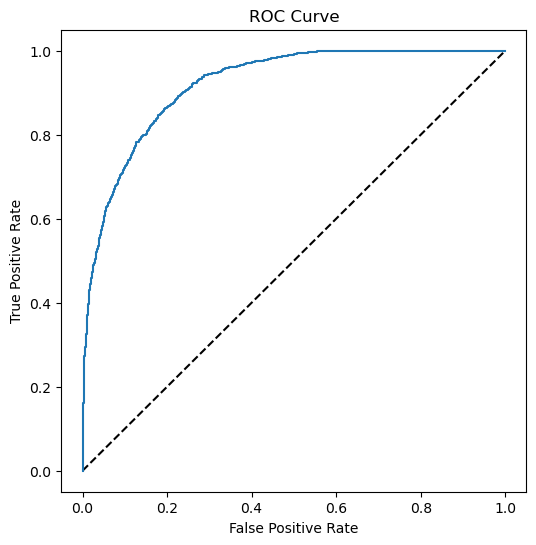

In [10]:
# Get predictions from test data
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)

# Get evaluation metrics
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('AUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()



The results look a little better, so clearly preprocessing the data has made a difference.

Los resultados se ven un poco mejores, por lo que claramente el preprocesamiento de los datos ha marcado la diferencia.

### Try a different algorithm - Pruebe con un algoritmo diferente

Now let's try a different algorithm. Previously we used a logistic regression algorithm, which is a *linear* algorithm. There are many kinds of classification algorithm we could try, including:

Ahora probemos con un algoritmo diferente. Anteriormente usamos un algoritmo de regresión logística, que es un algoritmo *lineal*. Hay muchos tipos de algoritmos de clasificación que podríamos probar, entre ellos:

- **Support Vector Machine algorithms**: Algorithms that define a *hyperplane* that separates classes.
- **Algoritmos de Máquina de Vectores de Soporte**: Algoritmos que definen un *hiperplano* que separa clases.

- **Tree-based algorithms**: Algorithms that build a decision tree to reach a prediction
- **Algoritmos basados en árboles**: algoritmos que construyen un árbol de decisión para llegar a una predicción

- **Ensemble algorithms**: Algorithms that combine the outputs of multiple base algorithms to improve generalizability.
- **Algoritmos de conjunto**: algoritmos que combinan los resultados de varios algoritmos básicos para mejorar la generalización.

This time, We'll use the same preprocessing steps as before, but we'll train the model using an *ensemble* algorithm named *Random Forest* that combines the outputs of multiple random decision trees (for more details, see the [Scikit-Learn documentation](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

Esta vez, usaremos los mismos pasos de preprocesamiento que antes, pero entrenaremos el modelo usando un algoritmo *ensamble* llamado *Random Forest* que combina los resultados de múltiples árboles de decisión aleatorios (para obtener más detalles, consulte [Scikit -Documentación de aprendizaje](https://scikit-learn.org/stable/modules/ensemble.html#forests-of-randomized-trees)).

In [11]:
from sklearn.ensemble import RandomForestClassifier

# Create preprocessing and training pipeline
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('logregressor', RandomForestClassifier(n_estimators=100))])

# fit the pipeline to train a random forest model on the training set
model = pipeline.fit(X_train, (y_train))
print (model)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  [0, 1, 2, 3, 4, 5, 6]),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [7])])),
                ('logregressor', RandomForestClassifier())])


Let's look at the performance metrics for the new model.

Veamos las métricas de rendimiento del nuevo modelo.

Confusion Matrix:
 [[2853  133]
 [ 170 1344]] 

Accuracy: 0.9326666666666666
Overall Precision: 0.909952606635071
Overall Recall: 0.8877146631439894

AUC: 0.9826492146087289


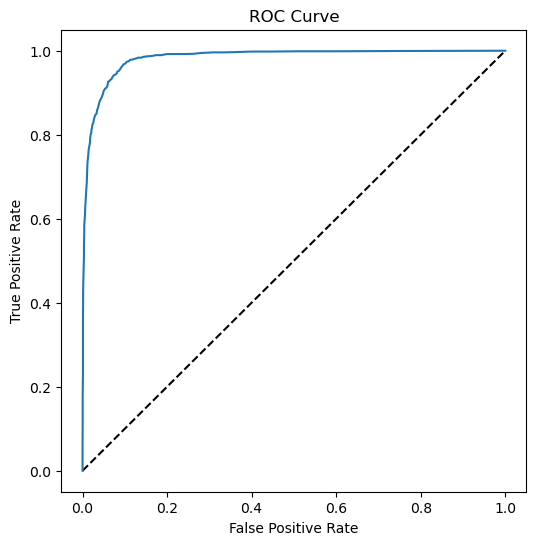

In [12]:
predictions = model.predict(X_test)
y_scores = model.predict_proba(X_test)
cm = confusion_matrix(y_test, predictions)
print ('Confusion Matrix:\n',cm, '\n')
print('Accuracy:', accuracy_score(y_test, predictions))
print("Overall Precision:",precision_score(y_test, predictions))
print("Overall Recall:",recall_score(y_test, predictions))
auc = roc_auc_score(y_test,y_scores[:,1])
print('\nAUC: ' + str(auc))

# calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores[:,1])

# plot ROC curve
fig = plt.figure(figsize=(6, 6))
# Plot the diagonal 50% line
plt.plot([0, 1], [0, 1], 'k--')
# Plot the FPR and TPR achieved by our model
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

That looks better! - ¡Eso se ve mejor!

### Use the Model for Inferencing - Usar el modelo para hacer inferencias
Now that we have a reasonably useful trained model, we can save it for use later to predict labels for new data:
Ahora que tenemos un modelo entrenado razonablemente útil, podemos guardarlo para usarlo más tarde para predecir etiquetas para nuevos datos:

In [13]:
import joblib

# Save the model as a pickle file
filename = './diabetes_model.pkl'
joblib.dump(model, filename)

['./diabetes_model.pkl']

When we have some new observations for which the label is unknown, we can load the model and use it to predict values for the unknown label:

In [14]:
# Load the model from the file
model = joblib.load(filename)

# predict on a new sample
# The model accepts an array of feature arrays (so you can predict the classes of multiple patients in a single call)
# We'll create an array with a single array of features, representing one patient
X_new = np.array([[2,180,74,24,21,23.9091702,1.488172308,22]])
print ('New sample: {}'.format(list(X_new[0])))

# Get a prediction
pred = model.predict(X_new)

# The model returns an array of predictions - one for each set of features submitted
# In our case, we only submitted one patient, so our prediction is the first one in the resulting array.
print('Predicted class is {}'.format(pred[0]))

New sample: [2.0, 180.0, 74.0, 24.0, 21.0, 23.9091702, 1.488172308, 22.0]
Predicted class is 1


## Summary - Resumen

In this notebook, we looked at a range of metrics for binary classification and tried a few algorithms beyond logistic regression. We will move onto more complex classification problems in the following notebook.

En este cuaderno, observamos una variedad de métricas para la clasificación binaria y probamos algunos algoritmos más allá de la regresión logística. Pasaremos a problemas de clasificación más complejos en el siguiente cuaderno.